Processing data samples in code can quickly become cluttered and challenging to maintain, making it essential to decouple dataset code from model training code for improved readability and modularity. Fortunately, PyTorch offers two data primitives, namely torch.utils.data.DataLoader and torch.utils.data.Dataset, to help you achieve this. The dataset stores samples and their corresponding labels, while the DataLoader wraps an iterable arund the Dataset to provide easy access to the samples.

To Make things even more convenient, PyTorch's domain libraries include several pre-loaded datasets, such as FashionMNIST, that subclass torch.utils.data.Dataset and come with functions that are specific to the particular data type. These datasets can be particularly useful for prototyping and benchmarking your model. You can find a wide range of pre-loaded datasets for images, text, and audio in the following location: __[Image Datasets](https://pytorch.org/vision/stable/datasets.html)__, __[Text Datasets](https://pytorch.org/text/stable/datasets.html)__, and __[Audio Datasets](https://pytorch.org/audio/stable/datasets.html)__

In [1]:
# LOADING A DATASET
# Here is an example of how to load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training examples and 10,000 test examples.
# Each example compromises a 28x28 grayscale image and an associated label from one of 10 classes.
# We load the FashionMNIST Dataset with the folowwing parameters:
'''
- root: is the path where the train/test data is stored
- train: specifies training or test dataset
- download=True downloads the data from the internet if it's not available at root
- transform and target_transform specify the feature and label transformations
'''

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
'''
We import torch, which is the primary package for tensor computations.
We also import the Dataset class from torch.utils.data module and the FashionMNIST class from the torchvision.datasets module, which is a pre-built dataset for image classification tasks.
ToTensor fct from torchvision.transforms module for data preprocessing.
And matplotlib.pyplot library to visualize the dataset
'''

C:\Users\Fatihi\.conda\envs\Pytorch_1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\nWe import torch, which is the primary package for tensor computations.\nWe also import the Dataset class from torch.utils.data module and the FashionMNIST class from the torchvision.datasets module, which is a pre-built dataset for image classification tasks.\nToTensor fct from torchvision.transforms module for data preprocessing.\nAnd matplotlib.pyplot library to visualize the dataset\n'

In [2]:
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
)
'''
The above snippet create an instance of the FashionMNIST dataset class, which will be used for training the model.
The dataset is downloaded to the "data" folder and the train = True argument indicates that the training set should be used.
The down = True argument will download the dataset if it is not already present in the "data" folder.
ToTensor() fct is used to convert the images to PyTorch tensors.
'''
test_data =datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
)
'''
The above snippet creates an instance of the FashionMNIST dataset class for testing the model. 
The dataset is downloaded to the "data" forlder and the train = False argument indicates that the testin set should be used.
The download = True argument will download the dataset if it is not already present in the "data" folder.
ToTensor() fct is used to convert the images to PyTorch tensors.
'''

'\nThe above snippet creates an instance of the FashionMNIST dataset class for testing the model. \nThe dataset is downloaded to the "data" forlder and the train = False argument indicates that the testin set should be used.\nThe download = True argument will download the dataset if it is not already present in the "data" folder.\nToTensor() fct is used to convert the images to PyTorch tensors.\n'

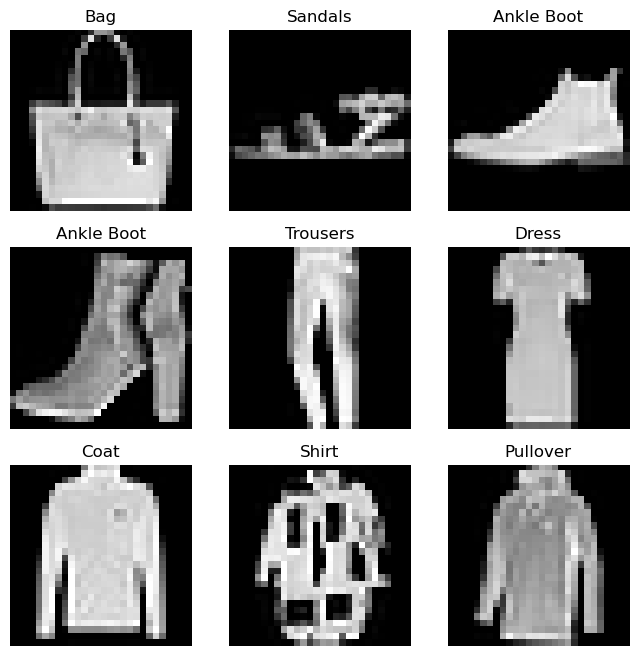

In [3]:
# ITERATING AND VISUALIZING THE DATASET

# We can index `Datasets` manually like a list: `training_data[index].
#We use `matplotlib` to visualize some samples in our training data.

# We create a dictionary called `labels_map` that maps integer labels to string labels, which will be used later to convert the integer labels of the images to their corresponding string labels.
labels_map = {
    0: "T-Shirt",
    1: "Trousers",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandals",
    6: "Shirt",
    7: "Sneakers",
    8: "Bag",
    9: "Ankle Boot",
}

# We create a new figure object using the `plt` module from matplotlib with a size of 8x8 inches
figure = plt.figure(figsize = (8,8))
# We assigns the values 3 and 3 to the variables `cols` and `rows` respectively
cols, rows = 3, 3
# We create a for loop that iterates over a range of values from 1 to the product of `clos` and `rows`, inclusive
for i in range(1, cols * rows + 1):
    # We generate a random integeer index between 9 and the length of the `training_data` dataset using the `randint` fct from the `torch` module. The `size` arg specifies tha we want a single random integer, and the `.item()` method exctracts the integer from a PyTorch tensor. 
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    # We get the image and label corresponding to the randomly selected index from the `training_data` dataset
    img, label = training_data[sample_idx]
    # We add a subplot to the figure at the current index `i` with `rows` rows and `cols` columns.
    figure.add_subplot(rows, cols, i)
    # We set the title of the current subplot to the string label corresponding to the integer label of the current image, using the `labels_map` dictionary created earlier
    plt.title(labels_map[label])
    # We turn off the axis labels and ticks for the current subplot
    plt.axis("off")
    # We display the image in the current subplot, with the grayscale colormap specified using the `cmap` arg. The `squeeze` method is used to remove any dimensions of size 1 from the image tensor, which can cause issues with displaying the image
    plt.imshow(img.squeeze(), cmap="gray")
# We display the final figure containing the randomly selected images with their corresponding labels.
plt.show()

## Exploratory Data Analysis (EDA)
EDA is the process of analyzing and visualizing data to summarize its main characteristics, detect patterns, and uncover relationships among the variables. It is an essential step in the data analysis process, as it helps to identify data quality issues, potential outliers, and relationships between variables that may be useful in building predictive models.
EDA involves a variety of techniques, including statistical analysis, data visualization, and data mining. Some common techniques used in EDA include histograms, scatter plots, box plots, heatmaps, and correlation matrices. These techniques can be used to explore the distribution of data, identify potential outliers, visualize relationships between vars, and detect patterns in the data. By visualizing the data in defferent ways, analysts can gain new insights into the data and identify new questions to investigate.
Overall, EDA is an important step in the data analysis process, as it helps to uncover insights and patterns that may not be immediately apparent from summary statistics alone. By gaining a deeper understanding of the data through EDA, analysts can make more informed decisions and build more effective predictive models.

In [6]:
# CREATING A CUSTOM DATASET FOR YOUR FILES

# A custom dataset class must implement three fct: __init__, __len__, and __getitem__.
# Taking a look at this implementation, the FashionMNIST images are stored in a directory img_dir, and their labels are stored separately in a CSV file annotation_file.

import os
import pandas as pd
from torchvision.io import read_image # read_image fct for loading image data

# We define a new class `CustomImageDataset` which extends the `Dataset` class. This allows the class to inherit some important methods from the parent class such as `__len__` and `__getitem__`
class CustomImageDataset(Dataset):
    '''
    __init__ fct is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms
    The labels.csv file looks like:
    tshirt1.jpg, 0
    tshirt2.jpg, 0
    .....
    ankleboot999.jpg, 9
    '''
    # This method is the class constructor and initializes the `CustomImageDataset` object.
    # It takes in four parameters: `annotations_file`(path to the CSV file containing image labels),
    # `transform` which is an optional transformation to apply to the images, and ` target_transform` which is also optional transformation to apply to the image labels.
    def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
        # This dataframe is expected to have two columns: the 1st column is expected to contain the filename of each image, and the second column should contain the corresponding label
        self.img_labels = pd.read_csv(annotaions_file)
        # We set the `self.img_dir` instance variable to the path specified by the `img_dir` parameter, the directory where the image files are located
        self.img_dir = img_dir
        # We set the `self.transform` instance variable to the transformation fct specified by the `transform` parameter. If not set it will be `None` by default.
        self.transfform = transform
        # We set the `self.target_transform` instance variable to the transformation fct specified by the `target_transform` parameter. if not set, it will be `None` aswell.
        self.target_transform = target_transform
        
        # The __len__ fct return the number of samples in our dataset
        def __len__(self):
            return len(self.img_labels)
        
        '''
        The __getitem__ fct loads and returns a sample from the dataset at the given index `idx`.
        Based on the index, it identifies the image's location on disk, converts that to a tensor using `read_image`, retrieves the corresponding label from the csv data in `self.img_labels`,
        call the transform fct on them (if applicable), and returns the tensor image and corresponding label in a tuple.
        '''
        def __getitem__(self, idx):
            # We construct the full path to the image file for the given index `idx` by joining the image directory path `self.img_dir` with the filename in the first column of the Panda DataFrame object `self.img_labels` at row `idx`
            img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
            # We use the `read_image` fct from the `torchvision.io` module to read the image file at `img_path` as a tensor. This fct handles the conversion of the image to a tensor and scales the pixel values to the range [0,1]
            image = read_image(img_path)
            # We retrieves the corresponding label for the image at index `idx` from the second column of the Pandas DataFrame object `self.img_labels`
            label = self.img_labels.iloc[idx, 1]
            # We apply the optional transoformation function `self.transform` to the image tensor ifit is not `None`.
            # This transformation fct could be a composition of several different image processing steps like normalization, data augmentation, resizing.
            if self.transform:
                image = self.transform(image)
            # We apply the optional transformation fct `self.tearget_transform` to the label if it is not `None`
            # This transformation fct could be any arbitrary fct that modifies the label, such as converting it to a one-hot encoding or scaling it.
            if self.target_transform:
                label = self.target_transform(label)
            # We return the image tensor and corresponding label as a tuple, which is a single iteration over the dataset, it can be used by the model to update its weights during training
            return image, label   

In [7]:
#PREPARING YOUR DATA FOR TRAINING WITH DataLoaders

# Load the data in batches during training
from torch.utils.data import DataLoader

# We create a data loader to load the training and testing data in batches during training, it takes 3 args:
# `training_data` which is the training dataset object that contains the image and label data
# ` batch_size` which means that during training, the model will receive input data in batches of 64.
# `shuffle` which randomly shuffles the training data before each epoch to improve training performance
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


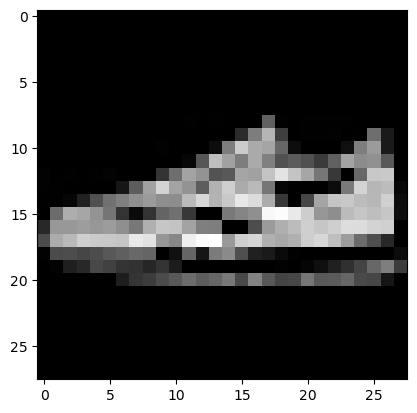

Label: 7


In [10]:
# ITERATE THROUGH THE DataLoader
'''
The `Dataset` retrieves our dataset's features and labels one sample at a time.
While training a model, we typically want to pass samples in "minibatches", reshuffle the data at every epoch to reduce model overffiting, and use Python's `multiprocessing` to speed up data retrieval.
`DataLoader` is an iterable that abstracts this complexity for us in an easy API.
'''

#Display image and label

# We load the first batch of data from the `train_dataloader` using the `next()` fct, which returns the next item from an iterator.
# Since `train_dataloader` is an iterator, this line loads the first batch of data from the training dataset
train_features, train_labels = next(iter(train_dataloader))
# We print the shape of the loaded batch of features and labels. in this case, the batch size is set to 64, so `train_features` and `train_labels` will have a shape of `(64, channels, height, width)` and `(64,)`, respectively.
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# We extract the first image from the batch, using the `squeeze()` method to remove any dimensions with size 1.
# This also converts the tensor from shape `(1, channels, height, width)` to (channels, h, w)
img = train_features[0].squeeze()
# We extract the first label from the batch, which coresponds to the first image
label = train_labels[0]
# We visualize the image using `matplotlib.pyplot.imshow()` fct. `cmap = "gray"` sets the color map to grayscale, and `plt.show()` display the image
plt.imshow(img, cmap = "gray")
plt.show()
print(f"Label: {label}")